In [20]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt # This imports matplotlib library for plotting

First we define the PCA function:

In [21]:
def PCA(X):
    
    # computes the covariance of X
    # numpy covariance function assumes different ordering, so we transpose X
    XCov = np.cov(X.T)
    
    # solves the eigenproblem and stores eigvals in D and eigvecs in V
    D, V = np.linalg.eig(XCov)
    
    # perform the linear transformation - matrix-matrix multiplication
    Yn = np.dot(X,V)

    # return the eigenvector matrix V, the transformed data Yn, and the eigenvalues D
    return V,Yn,D

In [22]:
# We define normalization function here, that is zscore function
# It is also known as standard score
def zscore(X): # z-score uses to normalise the data.
    
    # get the shape of the data matrix
    [nX,mX] = X.shape
    
    # compute the mean of every column X
    XMean = np.mean(X, axis=0)
    
    # compute standard deviation of each column
    XStd = np.std(X,axis=0,ddof=1)
    
    # subtract the mean from each column
    zX = X - np.kron(np.ones((nX,1)),XMean) # Z = [X - mX]
    
    # divide by the stdv
    Zscore = np.divide(zX,XStd)
    
    return Zscore

Then, we apply <i>PCA</i> function to the data and print eigenvalues associated with two PCs. The results indicate that the highest variance is held in the first PC with variance of ~1.83 while the second PC has variance of ~0.16.

PCA transforms the original data space to PC space where the highest information is held by the first PC. PCA will be extremely beneficial when we deal with high dimensional data sets, so we can discard unneccesary PCs which contain very low variance. 
This type of problem will be tested on real chemical data in the final tutorial.
The following code is to plot the original data together with the new transformation data as well
as their eigenvector (PCs) as the direction. The produced Figure demonstrates how the original data (blue
dots) rotate to form new transformation data (red dots).

In [ ]:
import pandas as pd
import numpy as np
# load the csv file containing the values
# , and r unnecessary 
data2 = pd.read_csv(r'C:\Users\JK\Desktop\MLfMS_Project\spectraldata.csv', delimiter=',')
#make a smaller df to play with values
trydata = data2[0:50]
# separate labels (only 1st columns values)
labels = trydata.iloc[:, :1].values
# from values (everything but the first column)
values = trydata.iloc[:, 1:].values
# if needed the column labels
exp = trydata.columns.values.tolist()
exp = exp[1:]

In [35]:
#find indexes of wines for each class (from output, the classification)

idx1 = np.where(labels=="nm200")
idx2 = np.where(labels == "nm220")
idx3 = np.where(labels== "nm240")
idx4 = np.where(labels == "nm260")
idx5 = np.where(labels=="nm280")
idx6 = np.where(labels=="nm300")
idx7 = np.where(labels=="nm325")
idx8 = np.where(labels=="nm350")
idx9 = np.where(labels=="nm375")
idx10 = np.where(labels=="nm400")


# FFT here

In [24]:
# this is the scipy implementation
# 
from scipy.fft import fft
fouriers = fft(values)

# numpy normalization
#furry = np.fft.fft(values, norm = 'forward')

# PCA here

In [25]:
## # Apply normalization
# # Next, we normalize the data
X = zscore(fouriers)

In [ ]:
# Applying PCA
V,Ypca,D = PCA(X)            # perform PCA, where V, Ypca and D are
                             # eigenvectors, new transformation and eigenvalues,
                             # respectively
print("Eigenvalues D: %s" % D)

In [27]:
# Here, we try to obtain the normalized cumulative sum (cumsum) of eigenvalues
# assuming D are the eigenvalues from PCA
idc = np.divide(np.cumsum(D),np.sum(D)) 

In [28]:
print(idc)

[0.11226838+3.19557576e-18j 0.20000233+4.45432672e-18j
 0.2771226 +4.48359143e-18j ... 1.        +1.58009165e-19j
 1.        +4.03037820e-22j 1.        +2.15704154e-32j]


# Plot here

C:\Python\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


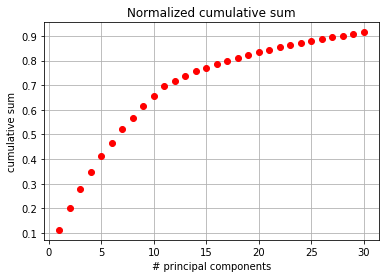

In [29]:
# We plot normalized cumulative sum to understand the contributions of the obtained PCs
plt.title('Normalized cumulative sum')
plt.xlabel('# principal components')
plt.ylabel('cumulative sum')

# The plot shows that PC1-6 explain all data variance.
plt.plot(range(1,len(D)-993),(idc[0:30]),'ro') # re-plot the data
#lt.plot(range(1,len(D)+1),(idc),'ro') # re-plot the data
plt.grid()
plt.show()

C:\Python\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


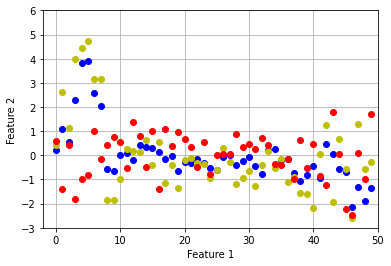

In [54]:
# Plot the original data first (normalized)

plt.figure(1)
plt.plot(Ypca[:,0],"bo",Ypca[:,1],"yo",Ypca[:,2], "ro", label='original') # re-plot the data
#plt.plot(X[:,0],X[:,1],'bo',label='zscored') # re-plot the data
#plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

#plt.title('Original data prior to PCA transformation')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.ylim(bottom=-3.0, top=6)
plt.xlim(left=-2, right=50)
plt.grid()
plt.show()

### Rubish from this part below

In [ ]:
defour = np.abs(np.fft.ifft(fouriers[0:35]))

In [ ]:
# We plot normalized cumulative sum to understand the contributions of the obtained PCs
plt.title('Normalized cumulative sum')
plt.xlabel('# principal components')
plt.ylabel('cumulative sum')

xax = ['PCA1', 'PCA2', 'PCA3', 'PCA4']

plt.bar(xax, idc[0:3]) # re-plot the data

#plt.grid()
plt.show()

In [ ]:
# This is for visualization, to get an overview how the PC's are distributed

#Setting the plot parameters --> naming
plt.title("First two PCA components")
plt.xlabel("X")
plt.ylabel("Y")

# this is just try out to get bar plot, you can use normal plt.plot to get a better view

#values = [0,0.2,1]
#acces to the fisrst two values by indexes 0 and 1, re-plot the data
plt.bar(Ypca[:,0], 1, '')
plt.bar(Ypca[:,1], 1) 

#draw the plot
plt.grid()
plt.tight_layout()

In [ ]:
# This is for visualization, to get an overview how the PC's are distributed

#Setting the plot parameters --> naming
plt.title("First two PCA components")
plt.xlabel("X")
plt.ylabel("Y")

#acces values by indexes 0 and 1, re-plot the data by using the labels 1-3
# the Y value is used to coloring the clusters
plt.plot(Ypca[idx1,0],Ypca[idx1,1], "bo") 
plt.plot(Ypca[idx2,0],Ypca[idx2,1], "ro") 
plt.plot(Ypca[idx3,0],Ypca[idx3,1], "go") 
plt.plot(Ypca[idx4,0],Ypca[idx4,1], "co") 
plt.plot(Ypca[idx5,0],Ypca[idx5,1], "mo") 
plt.plot(Ypca[idx6,0],Ypca[idx6,1], "yo") 
plt.plot(Ypca[idx7,0],Ypca[idx7,1], "ko") 
plt.plot(Ypca[idx8,0],Ypca[idx8,1], color = "plum", linestyle='', marker='o')
plt.plot(Ypca[idx9,0],Ypca[idx9,1], color = "sienna", linestyle='', marker='o')
plt.plot(Ypca[idx10,0],Ypca[idx10,1], color = "silver", linestyle='', marker='o')


#draw the plot
plt.grid()
plt.tight_layout()